# Úvod do práce s dátami pomocou knižníc Numpy a Pandas
* Intro do používania knižníc Pandas, Matplotlib a Numpy
* Ako použiť tieto knižnice na základne upravovanie formy dat (data cleaning, reshaping, wrangling)
* Veľmi ľahké základy exploratívnej analýzy a prace s chýbajúcimi hodnotami

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

### Na čo nám je Pandas?
* importovať dáta zo štandardných formátov
* vyčistiť
* pozrieť sa do dát (štatistiky, sampling (vzorkovanie), základné grafy)
* posunúť dáta na analýzu / trénovanie modelov

### Čo je Pandas?
* Python komunita sa inšpirovala a ukradla to dobré z `data.frame` štruktúry v R alebo obdobných štruktúr v Matlabe a Octave
* Umožňuje základné operácie s dátami, sampling, group by, merge, ...
* Ako základ je použité NumPy pole

### Základné úlohy
* Spracovanie chýbajúcich údajov (.dropna(), pd.isnull())
* Merge, join (concat, join)
* Group
* Zmena tvaru dát (pivotovanie) (stack, pivot)
* Práca s časovými radmi (resampling, timezones, ..)
* Kreslenie

## Niečo k Numpy

In [2]:
pole = [1,2,3]
pole * 3

[1, 2, 3, 1, 2, 3, 1, 2, 3]

In [3]:
np_pole = np.array([1,2,3])
np_pole * 3

array([3, 6, 9])

In [4]:
x = np.arange(20).reshape(4, 5) # skusit viacere dimenzie
x

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [5]:
x.shape

(4, 5)

In [6]:
x.ndim

2

In [7]:
# spocitanie sumy po jednotlivych dimenziach
# funguju aj ine agregacne funkcie
# netreba definovat os
x.sum(axis=1)

array([10, 35, 60, 85])

## Viacero typov čísel

In [8]:
x.dtype

dtype('int32')

In [9]:
a = np.array([.1,.2])
print(a)
a.dtype

[0.1 0.2]


dtype('float64')

In [10]:
c = np.array( [ [1,2], [3,4] ], dtype=complex )
print(c)
c.dtype

[[1.+0.j 2.+0.j]
 [3.+0.j 4.+0.j]]


dtype('complex128')

# Rôzne spôsoby ako vyrobiť pole

In [11]:
np.array([1,2,3])

array([1, 2, 3])

In [12]:
np.zeros((3,4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [13]:
np.ones((2,5))

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [14]:
np.repeat(3, 10).reshape([2,5])

array([[3, 3, 3, 3, 3],
       [3, 3, 3, 3, 3]])

In [15]:
np.linspace(0, 2, 9)

array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  ])

In [16]:
x = np.linspace( 0, 2*np.pi, 100 )
f = np.sin(x)
f

array([ 0.00000000e+00,  6.34239197e-02,  1.26592454e-01,  1.89251244e-01,
        2.51147987e-01,  3.12033446e-01,  3.71662456e-01,  4.29794912e-01,
        4.86196736e-01,  5.40640817e-01,  5.92907929e-01,  6.42787610e-01,
        6.90079011e-01,  7.34591709e-01,  7.76146464e-01,  8.14575952e-01,
        8.49725430e-01,  8.81453363e-01,  9.09631995e-01,  9.34147860e-01,
        9.54902241e-01,  9.71811568e-01,  9.84807753e-01,  9.93838464e-01,
        9.98867339e-01,  9.99874128e-01,  9.96854776e-01,  9.89821442e-01,
        9.78802446e-01,  9.63842159e-01,  9.45000819e-01,  9.22354294e-01,
        8.95993774e-01,  8.66025404e-01,  8.32569855e-01,  7.95761841e-01,
        7.55749574e-01,  7.12694171e-01,  6.66769001e-01,  6.18158986e-01,
        5.67059864e-01,  5.13677392e-01,  4.58226522e-01,  4.00930535e-01,
        3.42020143e-01,  2.81732557e-01,  2.20310533e-01,  1.58001396e-01,
        9.50560433e-02,  3.17279335e-02, -3.17279335e-02, -9.50560433e-02,
       -1.58001396e-01, -

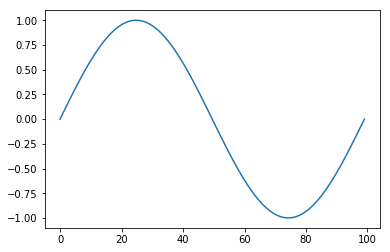

In [17]:
plt.plot(f)

## Maticové operácie

In [18]:
A = np.array( [[1,1], [0,1]] )
B = np.array( [[2,0], [3,4]] )

In [19]:
A

array([[1, 1],
       [0, 1]])

In [20]:
B

array([[2, 0],
       [3, 4]])

In [21]:
np.transpose(B)

array([[2, 3],
       [0, 4]])

In [22]:
A*B

array([[2, 0],
       [0, 4]])

In [23]:
# skutocne nasobenie matic
A.dot(B) # np.dot(A, B)

array([[5, 4],
       [3, 4]])

## Vyberanie prvkov

In [24]:
a = np.arange(10)**3
a

array([  0,   1,   8,  27,  64, 125, 216, 343, 512, 729], dtype=int32)

In [25]:
a[2]

8

In [26]:
a[2:5]

array([ 8, 27, 64], dtype=int32)

In [27]:
a[:6:2]

array([ 0,  8, 64], dtype=int32)

In [28]:
# vyber prvkov sa da pouzit aj na upravu pola
a[:6:2] = -1000
a

array([-1000,     1, -1000,    27, -1000,   125,   216,   343,   512,
         729], dtype=int32)

In [29]:
a[ 9: 3:-1]

array([  729,   512,   343,   216,   125, -1000], dtype=int32)

## Vyberanie prvkov z viacrozmerného poľa

In [30]:
b = np.arange(20).reshape(4,5)
b

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [31]:
# rozmery su oddelene ciarkou
b[2,3]

13

In [32]:
b[2,]

array([10, 11, 12, 13, 14])

In [33]:
b[1:3,2:4]

array([[ 7,  8],
       [12, 13]])

In [34]:
b[:,2:4]

array([[ 2,  3],
       [ 7,  8],
       [12, 13],
       [17, 18]])

Ďalšie operácie si pozrite 
* tu https://docs.scipy.org/doc/numpy-dev/user/quickstart.html
* a tu https://docs.scipy.org/doc/numpy-dev/reference/index.html

## Nejaké ukážky k Pandas

Pandas používa Numpy pole a nad ním si postavili typ `Series` a `DataFrame`

In [35]:
s = pd.Series([8,6,2,3,4])
s

0    8
1    6
2    2
3    3
4    4
dtype: int64

In [36]:
# k numpy polu je pridany explicitny index 
s.index

RangeIndex(start=0, stop=5, step=1)

In [37]:
s.values

array([8, 6, 2, 3, 4], dtype=int64)

In [38]:
s[0]

8

In [39]:
# na rozdiel od numpy vsak index moze byt aj nieco ine ako cislo
s2 = pd.Series(np.arange(4), index=['a', 'b', 'c', 'd'])
s2

a    0
b    1
c    2
d    3
dtype: int32

In [40]:
s2['c']

2

In [41]:
s2[2]

2

In [42]:
s2.c

2

In [43]:
# na vytvorenie Series objektu sa da pouzit aj asociativne pole
population = pd.Series({'Germany': 81.3, 'Belgium': 11.3, 'France': 64.3, 'United Kingdom': 64.9, 'Netherlands': 16.9})
population

Germany           81.3
Belgium           11.3
France            64.3
United Kingdom    64.9
Netherlands       16.9
dtype: float64

In [44]:
population['France']

64.3

In [45]:
# kedze je to postavene na Numpy, tak vieme robit vsetky zaujimave operacie
population * 1000

Germany           81300.0
Belgium           11300.0
France            64300.0
United Kingdom    64900.0
Netherlands       16900.0
dtype: float64

In [46]:
# index ma implicitne dane poradie, takze sa da robit rozsah
population['Belgium':'Netherlands']

Belgium           11.3
France            64.3
United Kingdom    64.9
Netherlands       16.9
dtype: float64

In [47]:
population.mean()

47.739999999999995

Dá sa pristupovať k prvkom tak, ako sme na to zvyknutí z R

In [48]:
population[['France', 'Netherlands']]

France         64.3
Netherlands    16.9
dtype: float64

In [49]:
population[population > 20]

Germany           81.3
France            64.3
United Kingdom    64.9
dtype: float64

No a `DataFrame` je vlastne multidimenzionálny `Series`

In [50]:
data = {'country': ['Belgium', 'France', 'Germany', 'Netherlands', 'United Kingdom'],
        'population': [11.3, 64.3, 81.3, 16.9, 64.9],
        'area': [30510, 671308, 357050, 41526, 244820],
        'capital': ['Brussels', 'Paris', 'Berlin', 'Amsterdam', 'London']}
countries = pd.DataFrame(data)
countries

,country,population,area,capital
0,Belgium,11.3,30510,Brussels
1,France,64.3,671308,Paris
2,Germany,81.3,357050,Berlin
3,Netherlands,16.9,41526,Amsterdam
4,United Kingdom,64.9,244820,London


In [51]:
countries.index

RangeIndex(start=0, stop=5, step=1)

In [52]:
countries.columns

Index(['country', 'population', 'area', 'capital'], dtype='object')

In [53]:
countries.values

array([['Belgium', 11.3, 30510, 'Brussels'],
       ['France', 64.3, 671308, 'Paris'],
       ['Germany', 81.3, 357050, 'Berlin'],
       ['Netherlands', 16.9, 41526, 'Amsterdam'],
       ['United Kingdom', 64.9, 244820, 'London']], dtype=object)

In [54]:
countries.dtypes

country        object
population    float64
area            int64
capital        object
dtype: object

In [55]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
country       5 non-null object
population    5 non-null float64
area          5 non-null int64
capital       5 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 240.0+ bytes


In [56]:
countries.describe()

,population,area
count,5.000000,5.000000
mean,47.740000,269042.800000
std,31.519645,264012.827994
min,11.300000,30510.000000
25%,16.900000,41526.000000
50%,64.300000,244820.000000
75%,64.900000,357050.000000
max,81.300000,671308.000000


In [57]:
countries.describe(include='all')

,country,population,area,capital
count,5,5.000000,5.000000,5
unique,5,NaN,NaN,5
top,United Kingdom,NaN,NaN,Amsterdam
freq,1,NaN,NaN,1
mean,NaN,47.740000,269042.800000,NaN
std,NaN,31.519645,264012.827994,NaN
min,NaN,11.300000,30510.000000,NaN
25%,NaN,16.900000,41526.000000,NaN
50%,NaN,64.300000,244820.000000,NaN
75%,NaN,64.900000,357050.000000,NaN


In [58]:
countries = countries.set_index('country')
countries

,population,area,capital
country,,,
Belgium,11.3,30510,Brussels
France,64.3,671308,Paris
Germany,81.3,357050,Berlin
Netherlands,16.9,41526,Amsterdam
United Kingdom,64.9,244820,London


a vieme teraz veľmi jednoducho pristupovať k jednotlivým stĺpcom

In [59]:
countries.area # countries['area']

country
Belgium            30510
France            671308
Germany           357050
Netherlands        41526
United Kingdom    244820
Name: area, dtype: int64

In [60]:
countries['population']*1000000 / countries['area'] # hustota zaludnenia

country
Belgium           370.370370
France             95.783158
Germany           227.699202
Netherlands       406.973944
United Kingdom    265.092721
dtype: float64

In [61]:
# vieme si jednoducho vyrobit novy stlpec
countries['density'] = countries['population']*1000000 / countries['area']
countries

,population,area,capital,density
country,,,,
Belgium,11.3,30510,Brussels,370.370370
France,64.3,671308,Paris,95.783158
Germany,81.3,357050,Berlin,227.699202
Netherlands,16.9,41526,Amsterdam,406.973944
United Kingdom,64.9,244820,London,265.092721


In [62]:
# existuje ale aj iny sposob ako spracovat vsetky riadky
countries['area_miles'] = countries.area.apply(lambda x: x / 2.58999)
countries['area_miles']

country
Belgium            11779.968262
France            259193.278739
Germany           137857.675126
Netherlands        16033.266538
United Kingdom     94525.461488
Name: area_miles, dtype: float64

In [63]:
# ak by ste chceli mat moznost pracovat s viacerimi atributmi naraz
countries.apply(lambda x: x.area / 2.58999, axis=1)
# dalo by sa iterovat aj cez stlpce ak axis=0. Dalo by sa to pouzit napriklad na nejake pocitanie statistik po stlpcoch

country
Belgium            11779.968262
France            259193.278739
Germany           137857.675126
Netherlands        16033.266538
United Kingdom     94525.461488
dtype: float64

In [64]:
# a na zaklade neho napriklad vyberat riadky
countries[countries['density'] > 300]

,population,area,capital,density,area_miles
country,,,,,
Belgium,11.3,30510,Brussels,370.370370,11779.968262
Netherlands,16.9,41526,Amsterdam,406.973944,16033.266538


In [65]:
# vieme potom napriklad usporiadavat
countries.sort_values(by='density', ascending=False)

,population,area,capital,density,area_miles
country,,,,,
Netherlands,16.9,41526,Amsterdam,406.973944,16033.266538
Belgium,11.3,30510,Brussels,370.370370,11779.968262
United Kingdom,64.9,244820,London,265.092721,94525.461488
Germany,81.3,357050,Berlin,227.699202,137857.675126
France,64.3,671308,Paris,95.783158,259193.278739


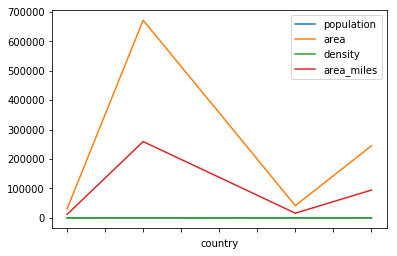

In [66]:
# velmi silna vlastnost je priamociare vykreslovanie
# countries.density.plot()
# countries.density.plot(kind='bar')
countries.plot()

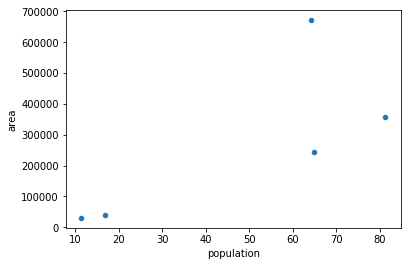

In [67]:
countries.plot(kind='scatter', x='population', y='area')

Keďže nám v `DataFrame` pribudla možnosť vyberať stĺpce podľa názvu, tak sa nám trochu skomplikovalo vyberanie prvkov oproti Numpy. Musíme rozoznávať 
* vyberanie podľa názvu a 
* podľa pozície.


In [68]:
countries['area']

country
Belgium            30510
France            671308
Germany           357050
Netherlands        41526
United Kingdom    244820
Name: area, dtype: int64

In [69]:
countries[['area', 'density']]

,area,density
country,,
Belgium,30510,370.370370
France,671308,95.783158
Germany,357050,227.699202
Netherlands,41526,406.973944
United Kingdom,244820,265.092721


In [70]:
# ked ale chceme rozsah, tak nam to pristupuje k riadkom
countries['France':'Netherlands']

,population,area,capital,density,area_miles
country,,,,,
France,64.3,671308,Paris,95.783158,259193.278739
Germany,81.3,357050,Berlin,227.699202,137857.675126
Netherlands,16.9,41526,Amsterdam,406.973944,16033.266538


Na pokročilejšie vyberanie z tabuľky používame:
* `loc` a
* `iloc`

In [71]:
# pristup ku konkretnej bunke pomocou riadka a stlpca
countries.loc['Germany', 'area']

357050

In [72]:
# tu sa daju pouzit aj rozsahy na oboch rozmeroch
countries.loc['France':'Germany', :]

,population,area,capital,density,area_miles
country,,,,,
France,64.3,671308,Paris,95.783158,259193.278739
Germany,81.3,357050,Berlin,227.699202,137857.675126


In [73]:
# ale aj vymenovanie
countries.loc[countries['density']>300, ['capital', 'population']]

,capital,population
country,,
Belgium,Brussels,11.3
Netherlands,Amsterdam,16.9


In [74]:
# iloc vybera podla poradia. Toto je podobne pristupovaniu k prvkom ako v Numpy
countries.iloc[0:2,1:3]

,area,capital
country,,
Belgium,30510,Brussels
France,671308,Paris


In [75]:
# samozrejem, ze sa stale daju priradovat hodnoty
countries.loc['Belgium':'Germany', 'population'] = 10
countries

,population,area,capital,density,area_miles
country,,,,,
Belgium,10.0,30510,Brussels,370.370370,11779.968262
France,10.0,671308,Paris,95.783158,259193.278739
Germany,10.0,357050,Berlin,227.699202,137857.675126
Netherlands,16.9,41526,Amsterdam,406.973944,16033.266538
United Kingdom,64.9,244820,London,265.092721,94525.461488


## Zmena tvaru dát pomocou Pandas

In [76]:
df = pd.DataFrame({'A':['one', 'one', 'two', 'two'], 'B':['a', 'b', 'a', 'b'], 'C':range(4)})
# df = pd.DataFrame({'A':['one', 'one', 'two', 'two'], 'B':['a', 'b', 'a', 'b'], 'C':range(4), 'D':range(4)})
df

,A,B,C
0,one,a,0
1,one,b,1
2,two,a,2
3,two,b,3


`unstack` presúva hodnoty v nejakom stĺpci a vytvorí z nich názvy stĺpcov

často sa nám to hodí ak máme dáta, ktoré sú v trochu inej forme ako by sme potrebovali

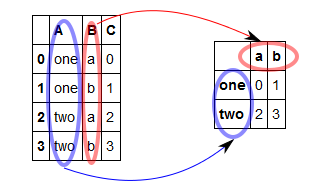

In [77]:
from IPython.display import Image
Image("img/stack.png")

In [78]:
df = df.set_index(['A', 'B']) # najskor si vyberieme stlpec, ktory pouzijeme ako index. 
# Ten druhy bude dodavat hodnoty do nazvov novych stlpcov
df

C
A   B   
one a  0
    b  1
two a  2
    b  3

In [79]:
# teraz si povieme, v ktorom stlpci su hodnoty a nechame to preskupit
result = df['C'].unstack()
result

B,a,b
A,,
one,0,1
two,2,3


### Kedy by som mohol potrebovať takúto transformáciu?

Predstavte si, že máte logy nejakej aplikácie, kde máte id používateľa a názov akcie, ktorú vykonal. Chcete vedieť, koľko krát spravil rôzne akcie každý používateľ a to vykresliť do obrázku.

In [80]:
row_count = 20
user_ids = np.random.choice([1,2,3,4], row_count)
actions = np.random.choice(['create', 'update', 'delete', 'retrieve', 'retrieve'], row_count)

df=pd.DataFrame({'user_id': user_ids, 'action': actions})
df.head()

,user_id,action
0,2,update
1,2,retrieve
2,3,update
3,1,delete
4,1,create


In [81]:
pom = df.groupby(['user_id', 'action']).size().reset_index() # operaciu groupby vam vysvetlim este raz kusok neskor
pom 

,user_id,action,0
0,1,create,2
1,1,delete,2
2,1,retrieve,1
3,1,update,2
4,2,create,2
5,2,retrieve,2
6,2,update,1
7,3,delete,1
8,3,update,2
9,4,create,1


In [82]:
pom = pom.set_index(['user_id', 'action'])
pom

0
user_id action     
1       create    2
        delete    2
        retrieve  1
        update    2
2       create    2
        retrieve  2
        update    1
3       delete    1
        update    2
4       create    1
        delete    2
        retrieve  1
        update    1

In [83]:
pom[0].unstack()
# pom[0].unstack(fill_value=0)

action,create,delete,retrieve,update
user_id,,,,
1,2.0,2.0,1.0,2.0
2,2.0,NaN,2.0,1.0
3,NaN,1.0,NaN,2.0
4,1.0,2.0,1.0,1.0


### Opačná operácia je stack

In [84]:
# Opacna transformacia je stack. Zoberie nazvy stlpcov a spravi z nich hodnoty
df = result.stack().reset_index(name='C')
df

,A,B,C
0,one,a,0
1,one,b,1
2,two,a,2
3,two,b,3


Táto operácia sa používa napríklad, ak máte viaceré pozorovania v jednom riadku a chcete ich rozdeliť. Napríklad na riadku máte teplotu počas rôznych hodín dňa a vy chcete mať na každom riadku len jednu hodnotu teploty a chcete mat namiesto toho 24 riadkov pre každý deň.

In [85]:
from datetime import datetime, timedelta
row_count = 5
index = [datetime.now().date() - timedelta(days=i) for i in range(row_count, 0, -1)]
data = dict(zip(range(24), np.random.rand(24, row_count) * 5 + 20))
df = pd.DataFrame(index=index, data=data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
2019-09-07,21.327851,23.798794,21.896181,21.087727,20.094302,20.650963,21.507930,20.281908,22.260917,20.108063,...,20.796603,22.450629,22.177041,21.706693,24.789375,23.834239,21.324672,23.556598,23.176052,21.581063
2019-09-08,23.151655,21.929471,23.269874,21.042346,21.255278,24.732037,21.860511,20.586765,21.050135,24.532499,...,22.396049,23.692429,23.064262,20.883758,21.680974,20.492108,20.824865,21.714584,22.851034,24.329777
2019-09-09,24.144930,24.377176,22.360527,21.164440,23.201053,24.327502,21.792622,24.510975,23.572084,21.333560,...,24.229537,23.388393,22.819437,22.896665,22.017112,23.522610,22.196826,20.657848,23.764347,20.598848
2019-09-10,21.610172,24.904365,22.617042,22.572084,24.804177,24.689163,21.031199,22.457061,24.309423,20.762180,...,20.825523,24.762464,22.116130,24.089933,20.584597,24.922555,20.926070,22.976286,21.733949,23.238381
2019-09-11,23.388509,22.070332,21.405424,23.826835,20.274194,24.994091,20.965935,23.453421,23.392010,23.776371,...,21.741335,20.952975,20.368148,22.553272,22.411381,20.770081,21.052904,21.026680,21.860229,20.211676


In [86]:
df.stack().reset_index(name='temperature')

,level_0,level_1,temperature
0,2019-09-07,0,21.327851
1,2019-09-07,1,23.798794
2,2019-09-07,2,21.896181
3,2019-09-07,3,21.087727
4,2019-09-07,4,20.094302
5,2019-09-07,5,20.650963
6,2019-09-07,6,21.507930
7,2019-09-07,7,20.281908
8,2019-09-07,8,22.260917
9,2019-09-07,9,20.108063


# Podobne ako unstack funguje aj pivot
Je to len špeciálny prípad predchádzajúcich dvoch funkcií, ale je ľahšie pochopiteľný a pravdepodobne vám toto bude úplne stačiť na väčšinu vecí. Hlavne ako náhrada unstack

[pekný príklad s vysvetlením](http://nikgrozev.com/2015/07/01/reshaping-in-pandas-pivot-pivot-table-stack-and-unstack-explained-with-pictures/)

In [87]:
# pivot je velmi podobny ako unstack, ale necha nastavit mena stlpcov a moze ich byt viac
df = pd.DataFrame({'A':['one', 'one', 'two', 'two'], 'B':['a', 'b', 'a', 'b'], 'C':range(4)})
df

,A,B,C
0,one,a,0
1,one,b,1
2,two,a,2
3,two,b,3


In [88]:
df.pivot(index='A', columns='B', values='C')

B,a,b
A,,
one,0,1
two,2,3


In [89]:
# pivot_table je podobne ako pivot, ale dokaze pracovat s duplicitnymi stlpcami a necha vas definovat agregacnu funkciu
df = pd.DataFrame({'A':['one', 'one', 'two', 'two', 'one', 'two'], 'B':['a', 'b', 'a', 'b', 'a', 'b'], 'C':range(6)})
df

,A,B,C
0,one,a,0
1,one,b,1
2,two,a,2
3,two,b,3
4,one,a,4
5,two,b,5


In [90]:
df.pivot_table(index='A', columns='B', values='C', aggfunc=np.sum) #aggfunct je defaultne np.mean

B,a,b
A,,
one,4,1
two,2,8


## Ďalšia častá operácia je groupby
určite poznáte z SQL

In [91]:
df = pd.DataFrame({'key':['A','B','C','A','B','C','A','B','C'],
                   'data': [0, 5, 10, 5, 10, 15, 10, 15, 20]})
df

,key,data
0,A,0
1,B,5
2,C,10
3,A,5
4,B,10
5,C,15
6,A,10
7,B,15
8,C,20


In [92]:
df.groupby('key').aggregate('sum') # df.groupby('key').sum()

,data
key,
A,15
B,30
C,45


# Zopár ďalších užitočných vecí pri práci s Pandas DataFrame

In [93]:
df = pd.read_csv('https://raw.githubusercontent.com/rasbt/python_reference/master/Data/some_soccer_data.csv')
df.head()

,PLAYER,SALARY,GP,G,A,SOT,PPG,P
0,Sergio Agüero\n Forward — Manchester City,$19.2m,16.0,14,3.0,34,13.12,209.98
1,Eden Hazard\n Midfield — Chelsea,$18.9m,21.0,8,4.0,17,13.05,274.04
2,Alexis Sánchez\n Forward — Arsenal,$17.6m,NaN,12,7.0,29,11.19,223.86
3,Yaya Touré\n Midfield — Manchester City,$16.6m,18.0,7,1.0,19,10.99,197.91
4,Ángel Di María\n Midfield — Manchester United,$15.0m,13.0,3,NaN,13,10.17,132.23


In [94]:
# premenovanie vybranych stlpcov
df = df.rename(columns={'P': 'points', 
                        'GP': 'games',
                        'SOT': 'shots_on_target',
                        'G': 'goals',
                        'PPG': 'points_per_game',
                        'A': 'assists',})
df.head()

,PLAYER,SALARY,games,goals,assists,shots_on_target,points_per_game,points
0,Sergio Agüero\n Forward — Manchester City,$19.2m,16.0,14,3.0,34,13.12,209.98
1,Eden Hazard\n Midfield — Chelsea,$18.9m,21.0,8,4.0,17,13.05,274.04
2,Alexis Sánchez\n Forward — Arsenal,$17.6m,NaN,12,7.0,29,11.19,223.86
3,Yaya Touré\n Midfield — Manchester City,$16.6m,18.0,7,1.0,19,10.99,197.91
4,Ángel Di María\n Midfield — Manchester United,$15.0m,13.0,3,NaN,13,10.17,132.23


## Transformácia hodnôt v stĺpci

In [95]:
df['SALARY'] = df['SALARY'].apply(lambda x: x.strip('$m'))
df.head()

,PLAYER,SALARY,games,goals,assists,shots_on_target,points_per_game,points
0,Sergio Agüero\n Forward — Manchester City,19.2,16.0,14,3.0,34,13.12,209.98
1,Eden Hazard\n Midfield — Chelsea,18.9,21.0,8,4.0,17,13.05,274.04
2,Alexis Sánchez\n Forward — Arsenal,17.6,NaN,12,7.0,29,11.19,223.86
3,Yaya Touré\n Midfield — Manchester City,16.6,18.0,7,1.0,19,10.99,197.91
4,Ángel Di María\n Midfield — Manchester United,15.0,13.0,3,NaN,13,10.17,132.23


## Pridanie prázdneho stĺpcu

In [96]:
df['team'] = pd.Series('', index=df.index)
df['position'] = pd.Series('', index=df.index)
df.head()

,PLAYER,SALARY,games,goals,assists,shots_on_target,points_per_game,points,team,position
0,Sergio Agüero\n Forward — Manchester City,19.2,16.0,14,3.0,34,13.12,209.98,,
1,Eden Hazard\n Midfield — Chelsea,18.9,21.0,8,4.0,17,13.05,274.04,,
2,Alexis Sánchez\n Forward — Arsenal,17.6,NaN,12,7.0,29,11.19,223.86,,
3,Yaya Touré\n Midfield — Manchester City,16.6,18.0,7,1.0,19,10.99,197.91,,
4,Ángel Di María\n Midfield — Manchester United,15.0,13.0,3,NaN,13,10.17,132.23,,


## Transformácia jedného stĺpca  a naplnenie viacerých naraz

In [97]:
def process_player_col(text):
    name, rest = text.split('\n')
    position, team = [x.strip() for x in rest.split(' — ')]
    return pd.Series([name, team, position])

df[['PLAYER', 'team', 'position']] = df.PLAYER.apply(process_player_col)
df.head()

,PLAYER,SALARY,games,goals,assists,shots_on_target,points_per_game,points,team,position
0,Sergio Agüero,19.2,16.0,14,3.0,34,13.12,209.98,Manchester City,Forward
1,Eden Hazard,18.9,21.0,8,4.0,17,13.05,274.04,Chelsea,Midfield
2,Alexis Sánchez,17.6,NaN,12,7.0,29,11.19,223.86,Arsenal,Forward
3,Yaya Touré,16.6,18.0,7,1.0,19,10.99,197.91,Manchester City,Midfield
4,Ángel Di María,15.0,13.0,3,NaN,13,10.17,132.23,Manchester United,Midfield


In [98]:
df['bla'] = pd.Series('', index=df.index)

## Zistenie, koľko riadkov a stĺpcov má prázdne hodnoty

Počet riadkov s aspoň jednou prázdnou hodnotou

In [99]:
df.shape[0] - df.dropna().shape[0]

3

Počet prázdnych hodnôt v stĺpcoch

In [100]:
df.isnull().sum()

PLAYER             0
SALARY             0
games              1
goals              0
assists            2
shots_on_target    0
points_per_game    0
points             1
team               0
position           0
bla                0
dtype: int64

Počet prázdnych hodnôt v riadkoch

In [101]:
df.isnull().sum(axis=1)

0    0
1    0
2    1
3    0
4    1
5    2
6    0
7    0
8    0
9    0
dtype: int64

Celkový počet prázdnych hodnôt v dátach

In [102]:
df.isnull().sum().sum()

4

## Vyber riadkov, kde sú prázdne hodnoty

Na základe jedného atribútu

In [103]:
df[df['assists'].isnull()]

,PLAYER,SALARY,games,goals,assists,shots_on_target,points_per_game,points,team,position,bla
4,Ángel Di María,15.0,13.0,3,NaN,13,10.17,132.23,Manchester United,Midfield,
5,Santiago Cazorla,14.8,20.0,4,NaN,20,9.97,NaN,Arsenal,Midfield,


Riadky, v ktorých je aspoň jedna prázdna hodnota

In [104]:
df[df.isnull().any(axis=1)]

,PLAYER,SALARY,games,goals,assists,shots_on_target,points_per_game,points,team,position,bla
2,Alexis Sánchez,17.6,NaN,12,7.0,29,11.19,223.86,Arsenal,Forward,
4,Ángel Di María,15.0,13.0,3,NaN,13,10.17,132.23,Manchester United,Midfield,
5,Santiago Cazorla,14.8,20.0,4,NaN,20,9.97,NaN,Arsenal,Midfield,


## Vyber plných riadkov

Na základe jedného atribútu

In [105]:
df[df['assists'].notnull()]
# df[~df['assists'].isnull()]

,PLAYER,SALARY,games,goals,assists,shots_on_target,points_per_game,points,team,position,bla
0,Sergio Agüero,19.2,16.0,14,3.0,34,13.12,209.98,Manchester City,Forward,
1,Eden Hazard,18.9,21.0,8,4.0,17,13.05,274.04,Chelsea,Midfield,
2,Alexis Sánchez,17.6,NaN,12,7.0,29,11.19,223.86,Arsenal,Forward,
3,Yaya Touré,16.6,18.0,7,1.0,19,10.99,197.91,Manchester City,Midfield,
6,David Silva,14.3,15.0,6,2.0,11,10.35,155.26,Manchester City,Midfield,
7,Cesc Fàbregas,14.0,20.0,2,14.0,10,10.47,209.49,Chelsea,Midfield,
8,Saido Berahino,13.8,21.0,9,0.0,20,7.02,147.43,West Brom,Forward,
9,Steven Gerrard,13.8,20.0,5,1.0,11,7.50,150.01,Liverpool,Midfield,


Na základe všetkých atribútov

In [106]:
df[df.notnull().all(axis=1)]

,PLAYER,SALARY,games,goals,assists,shots_on_target,points_per_game,points,team,position,bla
0,Sergio Agüero,19.2,16.0,14,3.0,34,13.12,209.98,Manchester City,Forward,
1,Eden Hazard,18.9,21.0,8,4.0,17,13.05,274.04,Chelsea,Midfield,
3,Yaya Touré,16.6,18.0,7,1.0,19,10.99,197.91,Manchester City,Midfield,
6,David Silva,14.3,15.0,6,2.0,11,10.35,155.26,Manchester City,Midfield,
7,Cesc Fàbregas,14.0,20.0,2,14.0,10,10.47,209.49,Chelsea,Midfield,
8,Saido Berahino,13.8,21.0,9,0.0,20,7.02,147.43,West Brom,Forward,
9,Steven Gerrard,13.8,20.0,5,1.0,11,7.50,150.01,Liverpool,Midfield,


Jednoduchšie

In [107]:
df.dropna()

,PLAYER,SALARY,games,goals,assists,shots_on_target,points_per_game,points,team,position,bla
0,Sergio Agüero,19.2,16.0,14,3.0,34,13.12,209.98,Manchester City,Forward,
1,Eden Hazard,18.9,21.0,8,4.0,17,13.05,274.04,Chelsea,Midfield,
3,Yaya Touré,16.6,18.0,7,1.0,19,10.99,197.91,Manchester City,Midfield,
6,David Silva,14.3,15.0,6,2.0,11,10.35,155.26,Manchester City,Midfield,
7,Cesc Fàbregas,14.0,20.0,2,14.0,10,10.47,209.49,Chelsea,Midfield,
8,Saido Berahino,13.8,21.0,9,0.0,20,7.02,147.43,West Brom,Forward,
9,Steven Gerrard,13.8,20.0,5,1.0,11,7.50,150.01,Liverpool,Midfield,


## Spájanie podmienok
Všimnite si zátvorky

In [108]:
df[ (df['team'] == 'Arsenal') | (df['team'] == 'Chelsea') ]

,PLAYER,SALARY,games,goals,assists,shots_on_target,points_per_game,points,team,position,bla
1,Eden Hazard,18.9,21.0,8,4.0,17,13.05,274.04,Chelsea,Midfield,
2,Alexis Sánchez,17.6,NaN,12,7.0,29,11.19,223.86,Arsenal,Forward,
5,Santiago Cazorla,14.8,20.0,4,NaN,20,9.97,NaN,Arsenal,Midfield,
7,Cesc Fàbregas,14.0,20.0,2,14.0,10,10.47,209.49,Chelsea,Midfield,


In [109]:
df[ (df['team'] == 'Arsenal') & (df['position'] == 'Forward') ]

,PLAYER,SALARY,games,goals,assists,shots_on_target,points_per_game,points,team,position,bla
2,Alexis Sánchez,17.6,NaN,12,7.0,29,11.19,223.86,Arsenal,Forward,


# Nejaké zdroje na štúdium
* http://nbviewer.jupyter.org/format/slides/github/jorisvandenbossche/2015-PyDataParis/blob/master/pandas_introduction.ipynb
* http://nbviewer.jupyter.org/github/rasbt/python_reference/blob/master/tutorials/things_in_pandas.ipynb
* [Pandas Cheat Sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Pandas_Cheat_Sheet_2.pdf), [nejaký komentár k tomu](http://www.kdnuggets.com/2017/01/pandas-cheat-sheet.html)

# Nejaké ďalšie nástroje
* [OpenRefine](http://openrefine.org/) - standalone nástroj na čistenie a pozeranie sa do dat
* [Trifacta](https://www.trifacta.com/products/wrangler/)

## SQL v Pandas

In [112]:
from pandasql import sqldf

In [113]:
from pandasql import load_meat, load_births

meat = load_meat()
births = load_births()

In [114]:
type(meat)

pandas.core.frame.DataFrame

In [115]:
meat.head()

,date,beef,veal,pork,lamb_and_mutton,broilers,other_chicken,turkey
0,1944-01-01,751.0,85.0,1280.0,89.0,NaN,NaN,NaN
1,1944-02-01,713.0,77.0,1169.0,72.0,NaN,NaN,NaN
2,1944-03-01,741.0,90.0,1128.0,75.0,NaN,NaN,NaN
3,1944-04-01,650.0,89.0,978.0,66.0,NaN,NaN,NaN
4,1944-05-01,681.0,106.0,1029.0,78.0,NaN,NaN,NaN


In [116]:
births.head()

,date,births
0,1975-01-01,265775
1,1975-02-01,241045
2,1975-03-01,268849
3,1975-04-01,247455
4,1975-05-01,254545


In [117]:
data = {'meat': meat}

In [118]:
sqldf('select * from meat limit 10', data)

,date,beef,veal,pork,lamb_and_mutton,broilers,other_chicken,turkey
0,1944-01-01 00:00:00.000000,751.0,85.0,1280.0,89.0,None,None,None
1,1944-02-01 00:00:00.000000,713.0,77.0,1169.0,72.0,None,None,None
2,1944-03-01 00:00:00.000000,741.0,90.0,1128.0,75.0,None,None,None
3,1944-04-01 00:00:00.000000,650.0,89.0,978.0,66.0,None,None,None
4,1944-05-01 00:00:00.000000,681.0,106.0,1029.0,78.0,None,None,None
5,1944-06-01 00:00:00.000000,658.0,125.0,962.0,79.0,None,None,None
6,1944-07-01 00:00:00.000000,662.0,142.0,796.0,82.0,None,None,None
7,1944-08-01 00:00:00.000000,787.0,175.0,748.0,87.0,None,None,None
8,1944-09-01 00:00:00.000000,774.0,182.0,678.0,91.0,None,None,None
9,1944-10-01 00:00:00.000000,834.0,215.0,777.0,100.0,None,None,None


In [119]:
data2 = {'meat2': meat}

In [120]:
sqldf('select * from meat2 limit 10', data2)

,date,beef,veal,pork,lamb_and_mutton,broilers,other_chicken,turkey
0,1944-01-01 00:00:00.000000,751.0,85.0,1280.0,89.0,None,None,None
1,1944-02-01 00:00:00.000000,713.0,77.0,1169.0,72.0,None,None,None
2,1944-03-01 00:00:00.000000,741.0,90.0,1128.0,75.0,None,None,None
3,1944-04-01 00:00:00.000000,650.0,89.0,978.0,66.0,None,None,None
4,1944-05-01 00:00:00.000000,681.0,106.0,1029.0,78.0,None,None,None
5,1944-06-01 00:00:00.000000,658.0,125.0,962.0,79.0,None,None,None
6,1944-07-01 00:00:00.000000,662.0,142.0,796.0,82.0,None,None,None
7,1944-08-01 00:00:00.000000,787.0,175.0,748.0,87.0,None,None,None
8,1944-09-01 00:00:00.000000,774.0,182.0,678.0,91.0,None,None,None
9,1944-10-01 00:00:00.000000,834.0,215.0,777.0,100.0,None,None,None


In [121]:
sqldf('select * from meat limit 10', locals())

,date,beef,veal,pork,lamb_and_mutton,broilers,other_chicken,turkey
0,1944-01-01 00:00:00.000000,751.0,85.0,1280.0,89.0,None,None,None
1,1944-02-01 00:00:00.000000,713.0,77.0,1169.0,72.0,None,None,None
2,1944-03-01 00:00:00.000000,741.0,90.0,1128.0,75.0,None,None,None
3,1944-04-01 00:00:00.000000,650.0,89.0,978.0,66.0,None,None,None
4,1944-05-01 00:00:00.000000,681.0,106.0,1029.0,78.0,None,None,None
5,1944-06-01 00:00:00.000000,658.0,125.0,962.0,79.0,None,None,None
6,1944-07-01 00:00:00.000000,662.0,142.0,796.0,82.0,None,None,None
7,1944-08-01 00:00:00.000000,787.0,175.0,748.0,87.0,None,None,None
8,1944-09-01 00:00:00.000000,774.0,182.0,678.0,91.0,None,None,None
9,1944-10-01 00:00:00.000000,834.0,215.0,777.0,100.0,None,None,None


In [122]:
sqldf('select * from births limit 10', locals())

,date,births
0,1975-01-01 00:00:00.000000,265775
1,1975-02-01 00:00:00.000000,241045
2,1975-03-01 00:00:00.000000,268849
3,1975-04-01 00:00:00.000000,247455
4,1975-05-01 00:00:00.000000,254545
5,1975-06-01 00:00:00.000000,254096
6,1975-07-01 00:00:00.000000,275163
7,1975-08-01 00:00:00.000000,281300
8,1975-09-01 00:00:00.000000,270738
9,1975-10-01 00:00:00.000000,265494


In [123]:
q = """
    SELECT
        m.date
        , b.births
        , m.beef
    FROM
        meat m
    INNER JOIN
        births b
            on m.date = b.date
    ORDER BY
        m.date
    LIMIT 100;
    """

joined = sqldf(q, locals())
print(joined.head())

                         date  births    beef
0  1975-01-01 00:00:00.000000  265775  2106.0
1  1975-02-01 00:00:00.000000  241045  1845.0
2  1975-03-01 00:00:00.000000  268849  1891.0
3  1975-04-01 00:00:00.000000  247455  1895.0
4  1975-05-01 00:00:00.000000  254545  1849.0


Pandasql beží na SQLite3, takže všetky klasické operácie v SQL viete robiť aj tu. Fungujú podmienky, vnorené dopyty, joiny, union, funkcie, ...

# Ďalšie veľmi pekné návody na prácu s dátami pomocou Pandas

toto sú notebooky jedného stretnutia, kde robili celkom dlhý tutorial
https://github.com/ResearchComputing/Meetup-Fall-2013

Vybrané konkrétne časti, ktoré sú pre nás špeciálne zaujímavé:

* https://github.com/ResearchComputing/Meetup-Fall-2013/blob/master/python/lecture_10_pandas_introduction.ipynb
* https://github.com/ResearchComputing/Meetup-Fall-2013/blob/master/python/lecture_11_pandas_adding_data.ipynb
* https://github.com/ResearchComputing/Meetup-Fall-2013/blob/master/python/lecture_12_pandas_groupby.ipynb
* https://github.com/ResearchComputing/Meetup-Fall-2013/blob/master/python/lecture_13_pandas_movies.ipynb
* https://github.com/ResearchComputing/Meetup-Fall-2013/blob/master/python/lecture_14_pandas_reshape.ipynb
* https://github.com/ResearchComputing/Meetup-Fall-2013/blob/master/python/lecture_15_pandas_transforming.ipynb
* https://github.com/ResearchComputing/Meetup-Fall-2013/blob/master/python/lecture_21_pandas_processing.ipynb
* https://github.com/ResearchComputing/Meetup-Fall-2013/blob/master/python/lecture_22_pandas_cleaning.ipynb
* https://github.com/ResearchComputing/Meetup-Fall-2013/blob/master/python/lecture_23_titanic_example.ipynb

# Kde si ďalej precvičiť používanie Pandas a Numpy


### Numpy
* 100 úloh aj so vzorovými riešeniami - https://github.com/rougier/numpy-100
* Ďalšie úlohy aj s riešeniami - https://www.w3resource.com/python-exercises/numpy/index.php
* Cheat Sheet - https://www.datacamp.com/community/blog/python-numpy-cheat-sheet

### Pandas
* 100 úloh aj so vzorovými riešeniami - https://github.com/ajcr/100-pandas-puzzles
* Ďalšie úlohy aj s riešeniami - https://www.w3resource.com/python-exercises/pandas/index.php
* Tutoriál priamo z dokumentácie ku knižnici - https://pandas.pydata.org/pandas-docs/stable/tutorials.html 
* Úlohy na rôznych skutočných datasetoch - https://github.com/guipsamora/pandas_exercises
* Pandas Cheat Sheet - https://www.datacamp.com/community/blog/python-pandas-cheat-sheet
* Data Wrangling in Python Cheat Sheet - https://www.datacamp.com/community/blog/pandas-cheat-sheet-python


# Spätná väzba: [https://tinyurl.com/iau2019-w02](https://tinyurl.com/iau2019-w02)